
# Finding the best fitting variogram model


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

import gstools as gs

In [2]:
import os 
import sys
sys.path.insert(0, '/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/src')
from Sinmod import Sinmod
from Cascade import Cascade
from Covariance import Covariance
from plotting.SinmodPlotting import SinmodPlotting

In [3]:
sinmod_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod/transfer_382450_files_da8d2b9a"
files = ["BioStates_froshelf.nc", "BioStates_midnor.nc"]
plot_test_path = "/Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/figures/tests/Sinmod/"

file_ind = 0
logging_kwargs = {
    "print_to_console": True,
    "log_file": plot_test_path + "Sinmod_notebook_log.txt",
    "overwrite_file": True
}
boundary_kwargs = {
    "border_file": "/border_files/cascade_test_xy.csv",
    "file_type": "xy"}

sinmod_c = Sinmod(sinmod_path + "/" + files[file_ind ], 
                        plot_path=plot_test_path,
                        log_kwargs=logging_kwargs,
                        boundary_kwargs=boundary_kwargs,
                      print_while_running=True)

2025-04-21 12:11:44 [INFO] [Sinmod] Setting up Sinmod class
2025-04-21 12:11:44 [INFO] [Sinmod] Setting up boundary
2025-04-21 12:11:44 [INFO] [Sinmod] Boundary kwargs: {'border_file': '/border_files/cascade_test_xy.csv', 'file_type': 'xy'}
2025-04-21 12:11:44 [INFO] [Sinmod] Reading file /Users/ajolaise/Library/CloudStorage/OneDrive-NTNU/PhD/code/CASCADE/data/sinmod/transfer_382450_files_da8d2b9a/BioStates_froshelf.nc
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    title: Current data from SINMOD
    institution: SINTEF Ocean
    grid_mapping: grid_mapping
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 160.0
    coordinate_north_pole: [13471.  11643.5]
    latitude_of_projection_origin: 90.0
    standard_parallel: 60.0
    barotropic_timestep: 1.3636363636363635
    baroclinic_timestep: 30.0
    _FillValue: -32768
    setup: FroShelf
    relax_e: T
    nested

In [48]:
Sx = sinmod_c.sinmod_data["flatten"]["xc"]
Sy = sinmod_c.sinmod_data["flatten"]["yc"]
calanus = sinmod_c.sinmod_data["flatten"]["calanus_finmarchicus"]
ocean_inds = sinmod_c.sinmod_data["flatten"]["ocean_inds"]
valid_inds = sinmod_c.sinmod_data["flatten"]["valid_points"]
Sx = Sx[valid_inds]
Sy = Sy[valid_inds]
calanus = calanus[:, valid_inds]
print("calanus shape", calanus.shape)


n = 2000
random_inds = np.random.choice(len(Sx), size=n, replace=False)
Sx_rnd = Sx[random_inds]
Sy_rnd = Sy[random_inds]
calanus_rnd = calanus[1, random_inds]
log_calanus_rnd = np.log(calanus_rnd + 0.0001)
S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
dist = distance_matrix(S_rnd, S_rnd)
diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
log_diff = np.abs(np.log(calanus_rnd[:, None]+0.0001) - np.log(calanus_rnd[None, :]+0.0001))
d = 15000
short_dist = dist[dist < d]
short_diff = diff[dist < d]


max_x = 30000
bins = np.linspace(0, max_x, 50)
bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), calanus_rnd, bins)
models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern
}
scores = {}

calanus shape (3, 37099)


calanus shape (3, 37099)
Model: Gaussian, Parameters: {'var': 10.836581185385038, 'len_scale': 8234.634332110316, 'nugget': 2.5529393880706586}, R2: 0.9897111669358906
Model: Exponential, Parameters: {'var': 15.232188739381872, 'len_scale': 9644.968221545041, 'nugget': 6.694091922482376e-08}, R2: 0.9885344729994728
Model: Matern, Parameters: {'var': 12.270504443919894, 'len_scale': 5264.054581912948, 'nugget': 1.698303891397976, 'nu': 1.4841418798387556}, R2: 0.9933606258658282
Model: Stable, Parameters: {'var': 12.18620260412685, 'len_scale': 8997.136728075026, 'nugget': 1.555555645441486, 'alpha': 1.5141136084760614}, R2: 0.9949433913190078
Model: Rational, Parameters: {'var': 11.465656064619049, 'len_scale': 8641.191852466154, 'nugget': 2.2719696066810275, 'alpha': 3.4525077956664205}, R2: 0.9912258286175434
Model: Circular, Parameters: {'var': 12.159922449663746, 'len_scale': 16879.638113064317, 'nugget': 1.123811049485929}, R2: 0.9986593556431526
Model: Spherical, Parameters: {'va

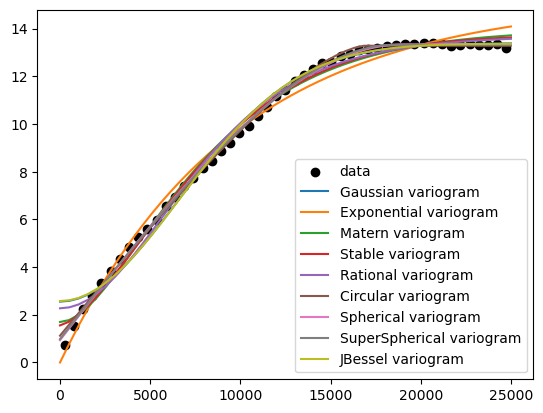

Model: Gaussian, Parameters: {'var': 12.164562056971011, 'len_scale': 8613.395211871286, 'nugget': 2.1597960913558962}, R2: 0.9941394960814671
Model: Exponential, Parameters: {'var': 17.311688893217507, 'len_scale': 11754.120353999602, 'nugget': 3.4627513599968464e-16}, R2: 0.9819452611744097
Model: Matern, Parameters: {'var': 12.164129492860614, 'len_scale': 4861.149643768306, 'nugget': 2.161445062234478, 'nu': 22.56713559416395}, R2: 0.9941367026310945
Model: Stable, Parameters: {'var': 12.702782255331918, 'len_scale': 9631.372886507863, 'nugget': 1.7721854358337885, 'alpha': 1.790829697155946}, R2: 0.995199672040418
Model: Rational, Parameters: {'var': 12.210010188479602, 'len_scale': 9670.388214961231, 'nugget': 2.1394936956426363, 'alpha': 49.99999999999999}, R2: 0.9941487263582746
Model: Circular, Parameters: {'var': 13.561449156899704, 'len_scale': 17506.762105000853, 'nugget': 0.5856431968174055}, R2: 0.9987320957854103
Model: Spherical, Parameters: {'var': 13.821079535188296, 

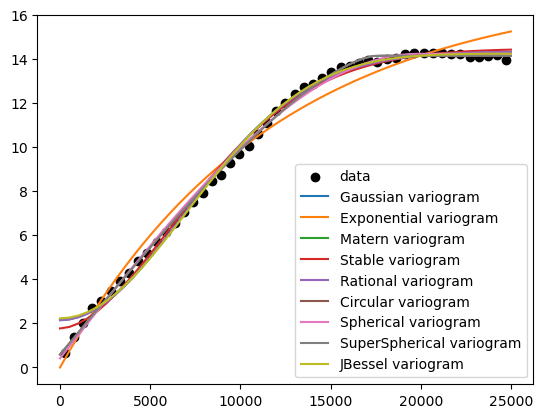

Model: Gaussian, Parameters: {'var': 12.589022591330183, 'len_scale': 8667.205412577438, 'nugget': 2.5544531170372133}, R2: 0.9917950141652718
Model: Exponential, Parameters: {'var': 18.011274667165978, 'len_scale': 11264.952283107265, 'nugget': 5.9355127953004885e-21}, R2: 0.986557937918691
Model: Matern, Parameters: {'var': 12.5890340837411, 'len_scale': 4889.912174549732, 'nugget': 2.554413033454498, 'nu': 21.015864558198587}, R2: 0.9917951145973831
Model: Stable, Parameters: {'var': 13.756086670149475, 'len_scale': 9611.315906415432, 'nugget': 1.7312631726970504, 'alpha': 1.6180179984992036}, R2: 0.9949129156263413
Model: Rational, Parameters: {'var': 12.898310721723146, 'len_scale': 9490.98686619296, 'nugget': 2.4198246103029644, 'alpha': 8.166575708177682}, R2: 0.9922586864656893
Model: Circular, Parameters: {'var': 14.079563990801624, 'len_scale': 17624.15524913338, 'nugget': 0.8920561191873942}, R2: 0.9987728804303561
Model: Spherical, Parameters: {'var': 14.359779240783292, 'l

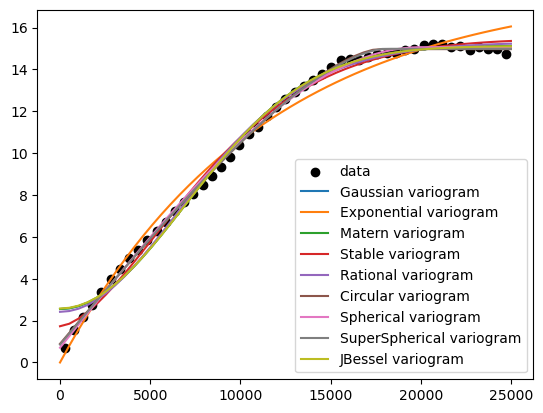

In [58]:
Sx = sinmod_c.sinmod_data["flatten"]["xc"]
Sy = sinmod_c.sinmod_data["flatten"]["yc"]
calanus = sinmod_c.sinmod_data["flatten"]["calanus_finmarchicus"]
ocean_inds = sinmod_c.sinmod_data["flatten"]["ocean_inds"]
valid_inds = sinmod_c.sinmod_data["flatten"]["valid_points"]
Sx = Sx[valid_inds]
Sy = Sy[valid_inds]
calanus = calanus[:, valid_inds]
print("calanus shape", calanus.shape)

models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern,
    "Stable": gs.Stable,
    "Rational": gs.Rational,
    "Circular": gs.Circular,
    "Spherical": gs.Spherical,
    "SuperSpherical": gs.SuperSpherical,
    "JBessel": gs.JBessel,
}

n = 3000
max_x = 25000
for i in range(3): 



    
    random_inds = np.random.choice(len(Sx), size=n, replace=False)
    Sx_rnd = Sx[random_inds]
    Sy_rnd = Sy[random_inds]
    calanus_rnd = calanus[i, random_inds]
    log_calanus_rnd = np.log(calanus_rnd + 0.0001)
    S_rnd = np.vstack((Sx_rnd, Sy_rnd)).T
    dist = distance_matrix(S_rnd, S_rnd)
    diff = np.abs(calanus_rnd[:, None] - calanus_rnd[None, :])
    log_diff = np.abs(np.log(calanus_rnd[:, None]+0.0001) - np.log(calanus_rnd[None, :]+0.0001))
    d = 15000
    short_dist = dist[dist < d]
    short_diff = diff[dist < d]

    
    bins = np.linspace(0, max_x, 50)
    bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), log_calanus_rnd, bins)
    # plot the estimated variogram
    plt.scatter(bin_center, gamma, color="k", label="data")
    ax = plt.gca()

    # fit all models to the estimated variogram
    for model in models:
        fit_model = models[model](dim=2)
        para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
        print(f"Model: {model}, Parameters: {para}, R2: {r2}")

        fit_model.plot(x_max=max_x, ax=ax)
        scores[model] = r2


        ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    print("RANKING by Pseudo-r2 score")
    for i, (model, score) in enumerate(ranking, 1):
        print(f"{i:>6}. {model:>15}: {score:.5}")

    plt.show()

Generate a synthetic field with an exponential model.



Estimate the variogram of the field with 40 bins and plot the result.



In [31]:
max_x = 30000
bins = np.linspace(0, max_x, 50)
bin_center, gamma = gs.vario_estimate((Sx_rnd, Sy_rnd), log_calanus_rnd, bins)

Define a set of models to test.



In [35]:
models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern
}
scores = {}

Iterate over all models, fit their variogram and calculate the r2 score.



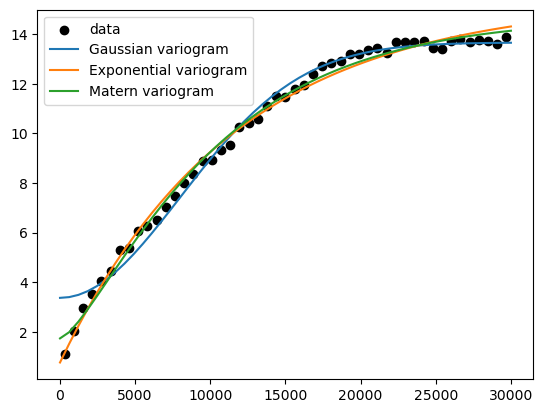

In [36]:
# plot the estimated variogram
plt.scatter(bin_center, gamma, color="k", label="data")
ax = plt.gca()

# fit all models to the estimated variogram
for model in models:
    fit_model = models[model](dim=2)
    para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
    fit_model.plot(x_max=max_x, ax=ax)
    scores[model] = r2

Create a ranking based on the score and determine the best models



In [37]:
ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("RANKING by Pseudo-r2 score")
for i, (model, score) in enumerate(ranking, 1):
    print(f"{i:>6}. {model:>15}: {score:.5}")

plt.show()

RANKING by Pseudo-r2 score
     1.          Matern: 0.99419
     2.     Exponential: 0.99286
     3.        Gaussian: 0.98381
